In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#from src.visualizations import *
import seaborn as sns
from src.constants import *

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)

In [ ]:
#train_values = pd.read_csv('../'+PATH_DATA_RAW+'train_values.csv', dtype = COLUMN_DTYPE)

In [ ]:
#train_labels = pd.read_csv('../'+PATH_DATA_RAW+'train_labels.csv')

### Merge entre datasets para vincular nivel de daño con features para cada edificacion

In [ ]:
#feature_damage = train_values.merge(train_labels)

In [ ]:
#feature_damage.head()

In [ ]:
#feature_damage.to_csv('../'+PATH_DATA_PROCESSED+'feature_damage.csv', index=False)

In [2]:
feature_damage = pd.read_csv('../'+PATH_DATA_PROCESSED+'feature_damage.csv')

In [63]:
feature_damage_numeric = pd.read_csv('../'+PATH_DATA_PROCESSED+'train_values_parsed_numeric_damage.csv')

In [3]:
feature_damage['damage_grade'].describe()


count    260601.000000
mean          2.238272
std           0.611814
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: damage_grade, dtype: float64

In [4]:
len(feature_damage)

260601

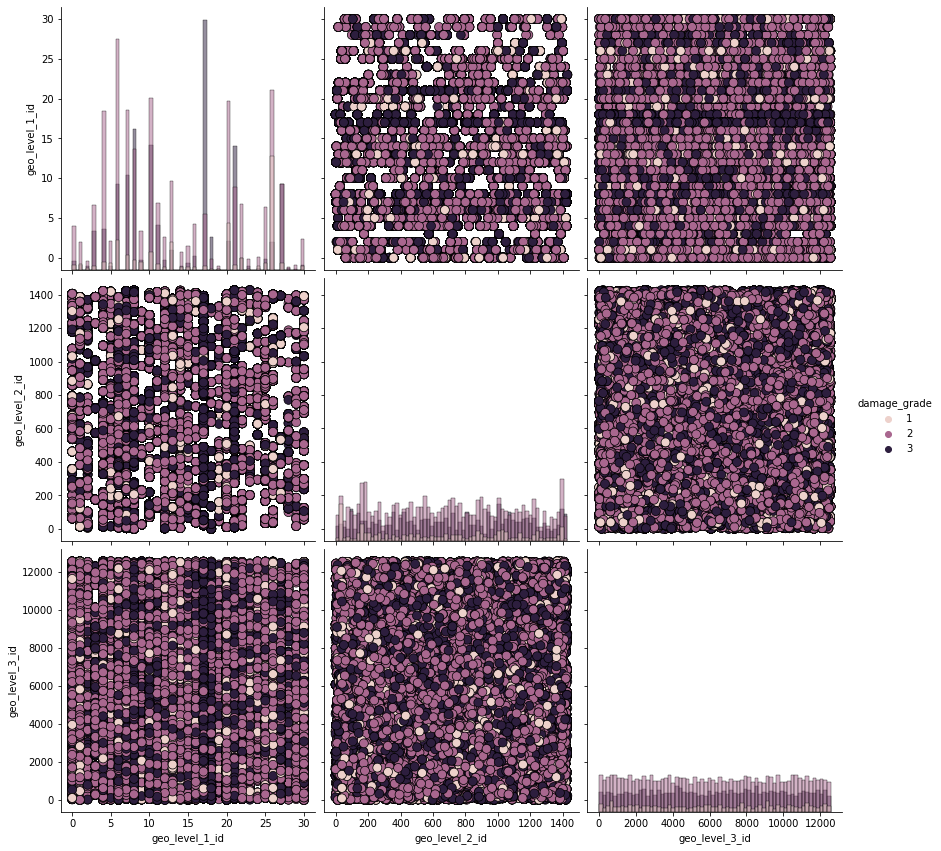

In [5]:
sns.pairplot(feature_damage.iloc[:, [1,2,3,-1]],
             vars = feature_damage.iloc[:, 1:4],
             hue='damage_grade',
             diag_kind = 'hist', 
             plot_kws = {'s': 80, 'edgecolor': 'k'},
             height=4
            )

Text(0, 0.5, 'Cantidad')

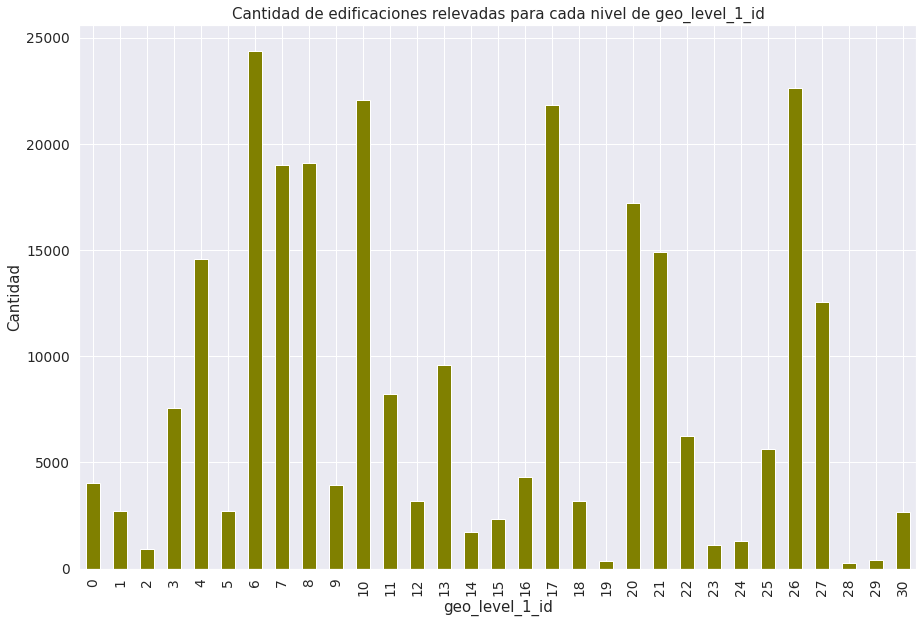

In [64]:
feature_damage.groupby(['geo_level_1_id']).size().plot(kind='bar', color='olive')
plt.rcParams.update({'font.size': 18, 'figure.figsize': (15, 10)})

plt.title("Cantidad de edificaciones relevadas para cada nivel de geo_level_1_id")
plt.ylabel("Cantidad")


In [14]:
feature_damage.groupby(['damage_grade', 'geo_level_1_id']).size().to_frame().reset_index().rename(columns={0:'total'}).sort_values(by=['damage_grade', 'total'], ascending=False)[:10]

,damage_grade,geo_level_1_id,total
78,3,17,17615
69,3,8,9913
71,3,10,8761
82,3,21,8710
68,3,7,6688
88,3,27,6060
67,3,6,6051
72,3,11,3162
65,3,4,2883
64,3,3,2745


In [32]:
corrmat = feature_damage.corr()

In [ ]:
feature_damage

In [ ]:
feature_damage.copy()

Text(0.5, 1.0, 'Matriz de correlacion (en forma de mapa de calor)')

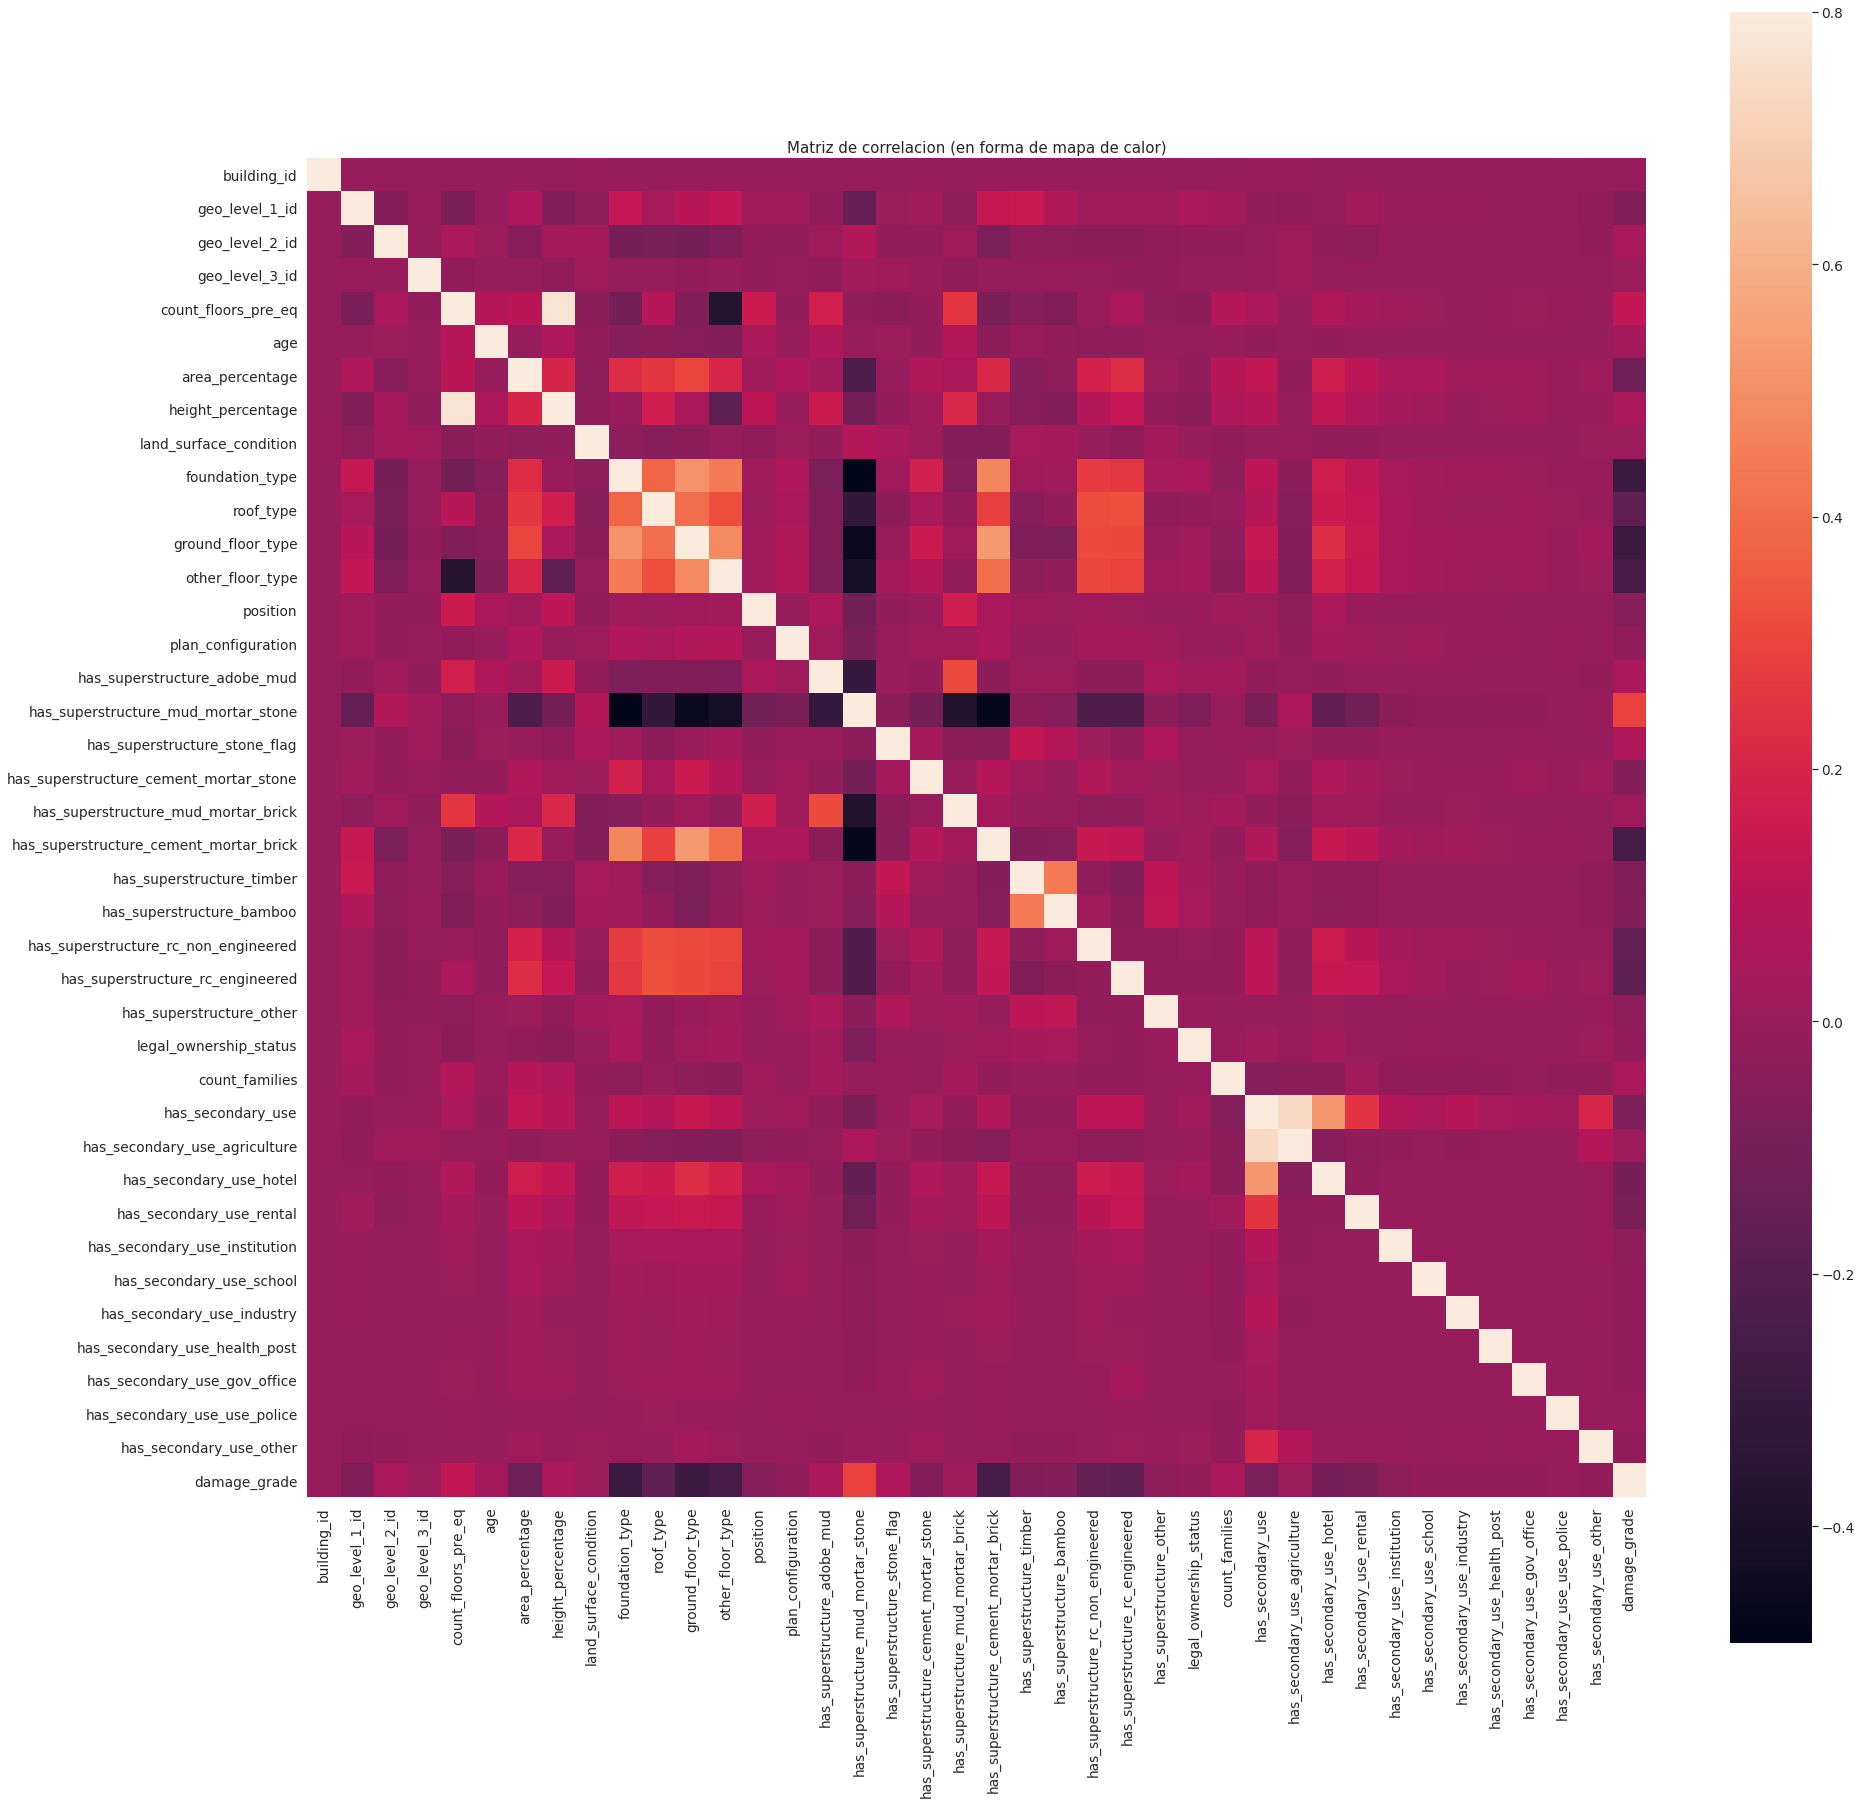

In [68]:
corrmat = feature_damage_numeric.corr()
f, ax = plt.subplots(figsize=(30, 30))
s = sns.heatmap(corrmat, vmax=.8, square=True)
fig = s.get_figure()
fig.savefig("../visualizations/matriz_correlacion_features.png", bbox_inches='tight')
plt.title("Matriz de correlacion (en forma de mapa de calor)")

In [ ]:
corrmat

In [48]:
import numpy as np

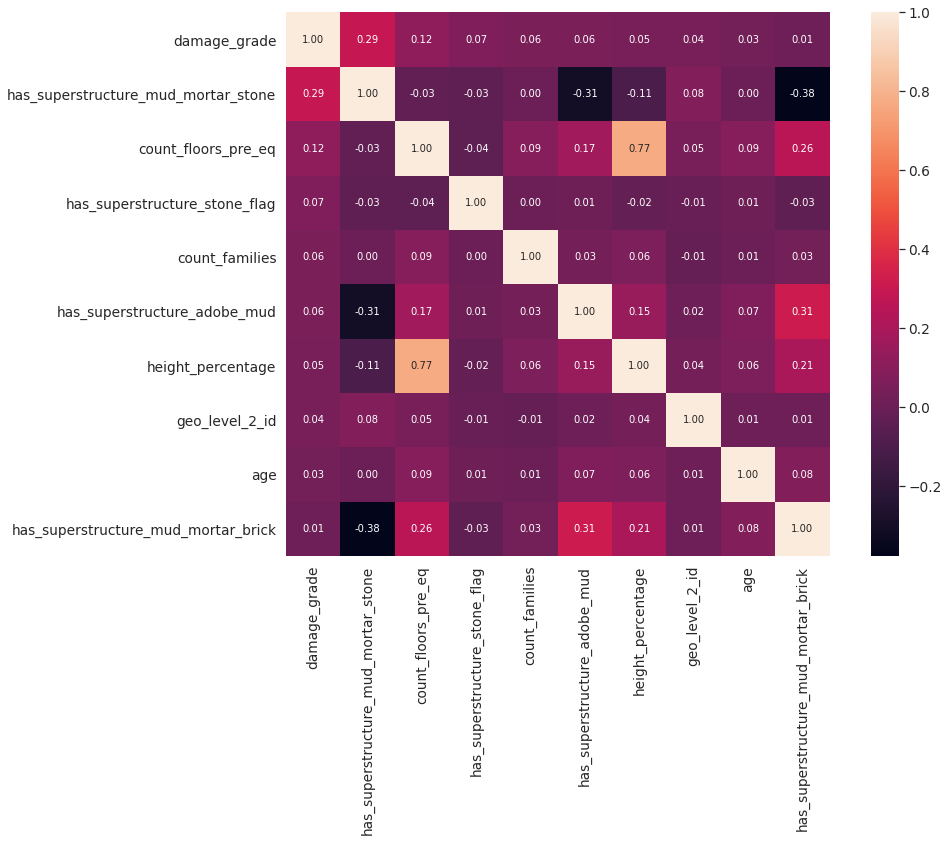

In [69]:
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'damage_grade')['damage_grade'].index
cm = np.corrcoef(feature_damage_numeric[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
fig = hm.get_figure()
fig.savefig("../visualizations/matriz_correlacion_features_10.png", bbox_inches='tight')
plt.show()

In [71]:
corr = feature_damage_numeric.corr()
corr[['damage_grade']].sort_values(by = 'damage_grade',ascending = False).style.background_gradient()

,damage_grade
damage_grade,1.000000
has_superstructure_mud_mortar_stone,0.291325
count_floors_pre_eq,0.122308
has_superstructure_stone_flag,0.066039
count_families,0.056151
has_superstructure_adobe_mud,0.055314
height_percentage,0.048130
geo_level_2_id,0.043161
age,0.029273
has_superstructure_mud_mortar_brick,0.014561


In [ ]:
#plt.rcParams.update({'font.size': 18, 'figure.figsize': [15, 10]})

sns.pairplot(feature_damage[['damage_grade', 'count_floors_pre_eq']],
             hue='damage_grade',
             kind='hist',
            height=3)

In [57]:
feature_damage.has_superstructure_mud_mortar_stone.value_counts()

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='damage_grade', ylabel='has_superstructure_mud_mortar_stone'>

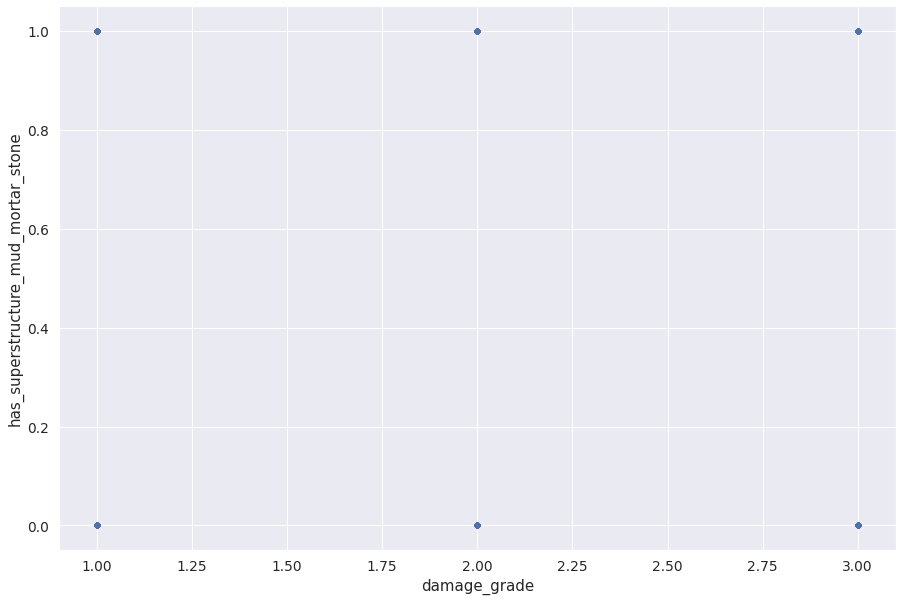

In [56]:
feature_damage.plot.scatter(x='damage_grade', y='has_superstructure_mud_mortar_stone')

geo_level_1_id vs damage_grade
geo_level_2_id vs damage_grade
geo_level_3_id vs damage_grade
count_floors_pre_eq vs damage_grade
age vs damage_grade
area_percentage vs damage_grade
height_percentage vs damage_grade
land_surface_condition vs damage_grade
foundation_type vs damage_grade
roof_type vs damage_grade
ground_floor_type vs damage_grade
other_floor_type vs damage_grade
position vs damage_grade


KeyboardInterrupt: 

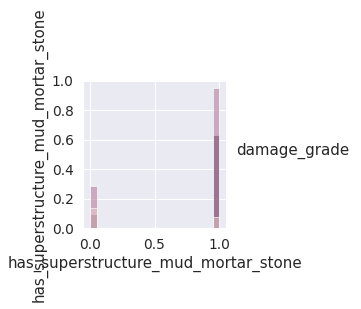

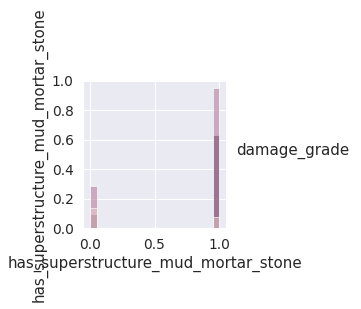

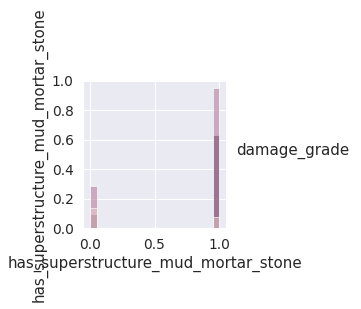

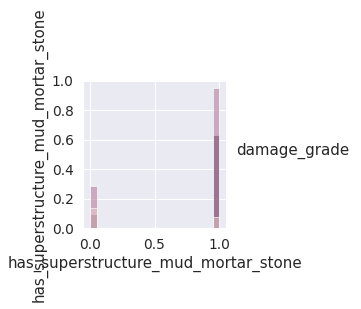

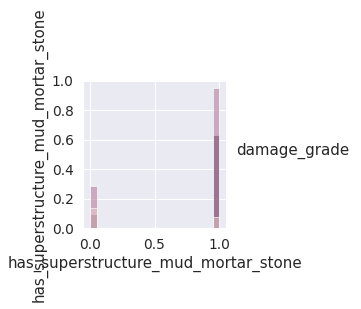

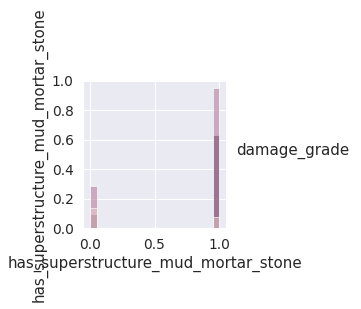

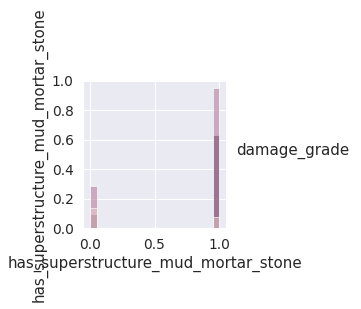

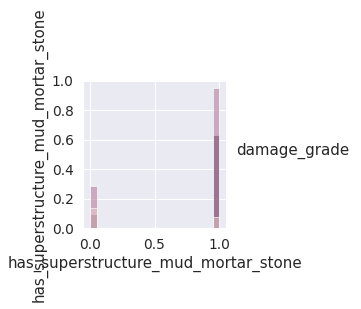

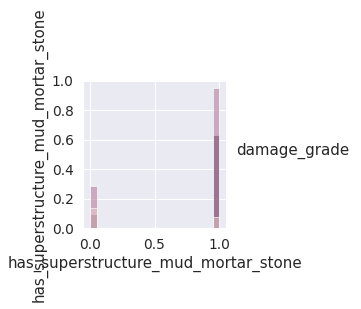

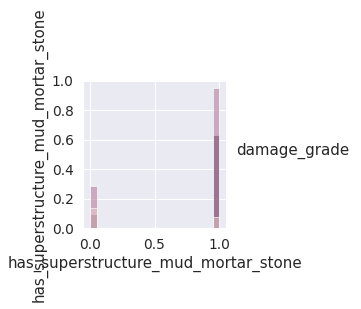

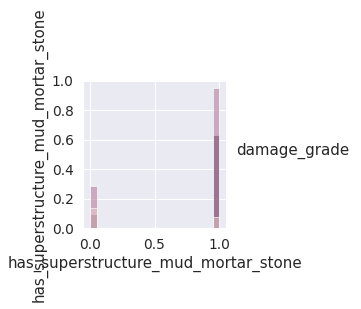

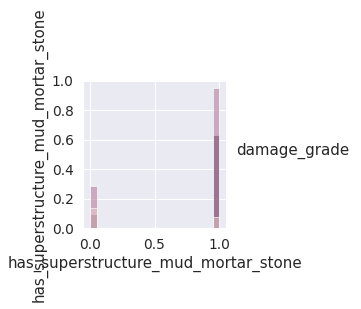

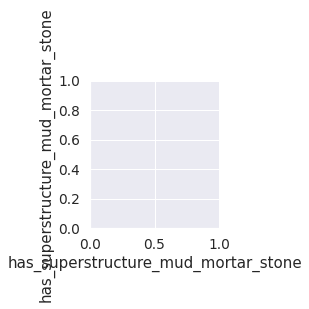

In [54]:
#plt.rcParams.update({'font.size': 18, 'figure.figsize': (15, 10)})
for c in feature_damage.columns.tolist()[1:-1]:
    print(f"{c} vs damage_grade")
    sns.pairplot(feature_damage[['damage_grade', 'has_superstructure_mud_mortar_stone']],
                 hue='damage_grade',
                 kind='hist',
                 height=3
                )
    plt.plot()